In [1]:
import librosa
from librosa import display
import os
import shutil
import random
import numpy as np 
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model

In [ ]:
TRAINING_FILES_PATH = 'Ravdess/'
TESS_ORIGINAL_FOLDER_PATH = 'TESS'

In [ ]:
class TESSPipeline:

    @staticmethod
    def create_tess_folders(path):
       
        counter = 0

        label_conversion = {'01': 'neutral',
                            '03': 'happy',
                            '04': 'sad',
                            '05': 'angry',
                            '06': 'fear',
                            '07': 'disgust',
                            '08': 'ps'}

        for subdir, dirs, files in os.walk(path):
            for filename in files:
                if filename.startswith('OAF'):
                    destination_path = TRAINING_FILES_PATH + 'Actor_26/'
                    old_file_path = os.path.join(os.path.abspath(subdir), filename)

                    # Separate base from extension
                    base, extension = os.path.splitext(filename)

                    for key, value in label_conversion.items():
                        if base.endswith(value):
                            random_list = random.sample(range(10, 99), 7)
                            file_name = '-'.join([str(i) for i in random_list])
                            file_name_with_correct_emotion = file_name[:6] + key + file_name[8:] + extension
                            new_file_path = destination_path + file_name_with_correct_emotion
                            shutil.copy(old_file_path, new_file_path)

                else:
                    destination_path = TRAINING_FILES_PATH + 'Actor_25/'
                    old_file_path = os.path.join(os.path.abspath(subdir), filename)

                    # Separate base from extension
                    base, extension = os.path.splitext(filename)

                    for key, value in label_conversion.items():
                        if base.endswith(value):
                            random_list = random.sample(range(10, 99), 7)
                            file_name = '-'.join([str(i) for i in random_list])
                            file_name_with_correct_emotion = (file_name[:6] + key + file_name[8:] + extension).strip()
                            new_file_path = destination_path + file_name_with_correct_emotion
                            shutil.copy(old_file_path, new_file_path)


if __name__ == '__main__':
    TESSPipeline.create_tess_folders(TESS_ORIGINAL_FOLDER_PATH)

In [ ]:
Savee_training_path = 'Ravdess/'
Savee_original_data_path = 'Savee'

In [ ]:
class SaveePipeline:

    @staticmethod
    def create_savee_folder(path):
       
        counter = 0

        label_conversion = {'01': 'n',
                            '03': 'h',
                            '04': 'sa',
                            '05': 'a',
                            '06': 'f',
                            '07': 'd',
                            '08': 'su'}

        for subdir, dirs, files in os.walk(path):
            for filename in files:
              destination_path = TRAINING_FILES_PATH + 'Savee/'
              old_file_path = os.path.join(os.path.abspath(subdir), filename)

              base, extension = os.path.splitext(filename)

              for key, value in label_conversion.items():
                if(((filename.split('.')[0]).split('_')[1][:-2]) == value):
                  random_list = random.sample(range(10, 99), 7)
                  file_name = '-'.join([str(i) for i in random_list])
                  file_name_with_correct_emotion = file_name[:6] + key + file_name[8:] + extension
                  new_file_path = destination_path + file_name_with_correct_emotion
                  shutil.copy(old_file_path, new_file_path)
                    

if __name__ == '__main__':
    SaveePipeline.create_savee_folder(Savee_original_data_path)

In [ ]:
TRAINING_FILES_PATH = 'Ravdess/'
crema_original_data_path = 'crema'

In [ ]:
class CremaPipeline:

    @staticmethod
    def create_crema_folder(path):
       
        counter = 0

        label_conversion = {'01': 'NEU',
                            '03': 'HAP',
                            '04': 'SAD',
                            '05': 'ANG',
                            '06': 'FEA',
                            '07': 'DIS'}
        

        for subdir, dirs, files in os.walk(path):
            for filename in files:
              destination_path = TRAINING_FILES_PATH + 'crema/'
              old_file_path = os.path.join(os.path.abspath(subdir), filename)

              base, extension = os.path.splitext(filename)

              for key, value in label_conversion.items():
                if(filename.split('_')[2] == value):
                  random_list = random.sample(range(10, 99), 7)
                  file_name = '-'.join([str(i) for i in random_list])
                  file_name_with_correct_emotion = file_name[:6] + key + file_name[8:] + extension
                  new_file_path = destination_path + file_name_with_correct_emotion
                  shutil.copy(old_file_path, new_file_path)
                    

if __name__ == '__main__':
    CremaPipeline.create_crema_folder(crema_original_data_path)

In [46]:
count = 0
for subdir, dirs, files in os.walk('Ravdess'):
  for file in files:
    if int(file[7:8]) != 8 and int(file[7:8]) != 2:
        count = count + 1

print(count)

3876


In [3]:
import time
import os
path = 'Ravdess'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        if int(file[7:8]) != 8 and int(file[7:8]) != 2:
            try:
                #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
                X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
                # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
                # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
                file = int(file[7:8]) - 1 
                arr = mfccs, file
                lst.append(arr)
                # If the file is not valid, skip it
            except ValueError:
                continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 295.8611605167389 seconds ---


In [ ]:
path = ''

In [ ]:
class Spectrograms_to_emotion_folders:

  @staticmethod
  def create_folders(path, folder_path):
    

    label_conversion = {'01': 'neutral',
                            '02': 'happy',
                            '03': 'sad',
                            '04': 'angry',
                            '05': 'fear',
                            '06': 'disgust'}
        
    for emotion_number, emotions in label_conversion.items():
      new_folder = emotions
      new_folder_path = folder_path + new_folder + '/'
      ! mkdir {new_folder_path}
    """
    newfolder = 'specs'
    newfolderpath = folder_path + newfolder +'/'
    ! mkdir {newfolderpath}

    """
    for subdir, dirs, files in os.walk(path):
        for filenames in files:
            print(filenames)
            x, sr = librosa.load (subdir+'/'+filenames, sr=22050)
            S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)
            log_S = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
            fig1 = plt.gcf()
            plt.axis('off')
            """
            if(filenames[6:8] == '02'):
            filenames = filenames[:6] + '01' + filenames[8:]"""
            image_fname = filenames.split('.')[0] + '.png'
            fig1.savefig(folder_path +'/' + image_fname, dpi=100) 
            """
            for emotion_number, emotions in label_conversion.items():
            if(image_fname[6:8] == emotion_number):"""

        

if __name__ == '__main__':
    Spectrograms_to_emotion_folders.create_folders(path, in_path)



In [4]:
len(lst)

11510

In [5]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [6]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((11510, 40), (11510,))

In [7]:
# Saving joblib files to not load them again with the loop above
import joblib
X_name = 'X1.joblib'
y_name = 'y1.joblib'
save_dir = 'Features_joblib'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
import pandas as pd

In [28]:
# Loading saved models
import joblib
X = joblib.load('Features_joblib/X.joblib')
y = joblib.load('Features_joblib/y.joblib')

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
y_train.shape

(4201,)

In [31]:
max(y_test)

7

In [32]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [33]:
print(x_traincnn.shape)

(4201, 40, 1)


In [34]:
x_traincnn.shape, x_testcnn.shape

((4201, 40, 1), (1051, 40, 1))

In [35]:

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
adam=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_4 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_5 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)          

In [23]:
"""# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(40,1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()
"""

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 40, 256)           2304      
_________________________________________________________________
activation_8 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 40, 256)           524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 256)           1024      
_________________________________________________________________
activation_9 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8, 256)           

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

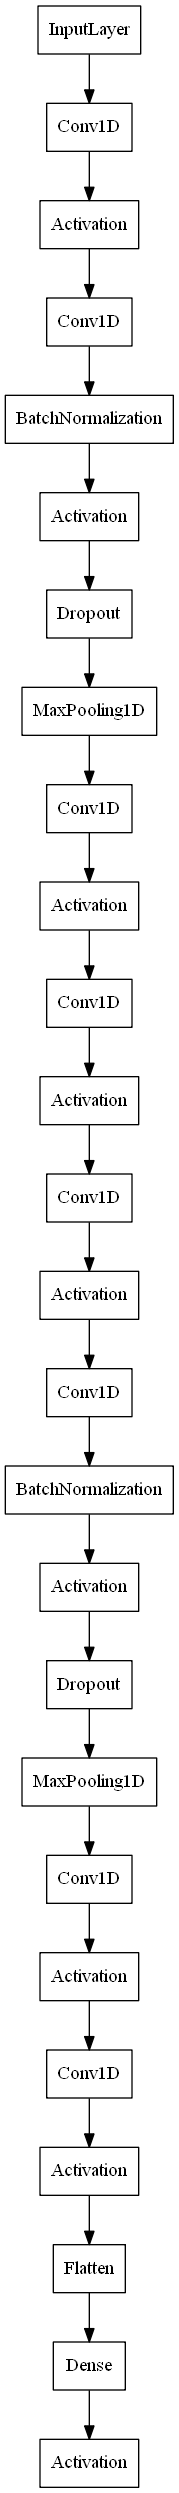

In [25]:
plot_model(model, to_file='cnn_model2.png', show_shapes=False, show_layer_names=False)

In [37]:
checkpoint_filepath = 'RT_cnn1.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [38]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test),callbacks=[model_checkpoint_callback] )

Epoch 1/500
263/263 [==============================] - 1s 5ms/step - loss: 3.0023 - accuracy: 0.2492 - val_loss: 1.5535 - val_accuracy: 0.4453
Epoch 2/500
263/263 [==============================] - 1s 5ms/step - loss: 1.6977 - accuracy: 0.4392 - val_loss: 1.2903 - val_accuracy: 0.5566
Epoch 3/500
263/263 [==============================] - 1s 5ms/step - loss: 1.3841 - accuracy: 0.5325 - val_loss: 1.1682 - val_accuracy: 0.5690
Epoch 4/500
263/263 [==============================] - 1s 5ms/step - loss: 1.2021 - accuracy: 0.5791 - val_loss: 1.0724 - val_accuracy: 0.6327
Epoch 5/500
263/263 [==============================] - 1s 5ms/step - loss: 1.1024 - accuracy: 0.6129 - val_loss: 0.9976 - val_accuracy: 0.6546
Epoch 6/500
263/263 [==============================] - 1s 4ms/step - loss: 1.0474 - accuracy: 0.6187 - val_loss: 0.9542 - val_accuracy: 0.6441
Epoch 7/500
263/263 [==============================] - 1s 5ms/step - loss: 0.9817 - accuracy: 0.6498 - val_loss: 0.8926 - val_accuracy: 0.6794

Epoch 58/500
263/263 [==============================] - 1s 4ms/step - loss: 0.3862 - accuracy: 0.8560 - val_loss: 0.4763 - val_accuracy: 0.8240
Epoch 59/500
263/263 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8617 - val_loss: 0.4808 - val_accuracy: 0.8097
Epoch 60/500
263/263 [==============================] - 1s 4ms/step - loss: 0.3750 - accuracy: 0.8588 - val_loss: 0.4689 - val_accuracy: 0.8202
Epoch 61/500
263/263 [==============================] - 1s 5ms/step - loss: 0.3664 - accuracy: 0.8634 - val_loss: 0.4644 - val_accuracy: 0.8316
Epoch 62/500
263/263 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.8650 - val_loss: 0.4795 - val_accuracy: 0.8164
Epoch 63/500
263/263 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.8657 - val_loss: 0.4731 - val_accuracy: 0.8145
Epoch 64/500
263/263 [==============================] - 1s 4ms/step - loss: 0.3592 - accuracy: 0.8665 - val_loss: 0.4724 - val_accuracy:

Epoch 115/500
263/263 [==============================] - 1s 4ms/step - loss: 0.1743 - accuracy: 0.9379 - val_loss: 0.4022 - val_accuracy: 0.8497
Epoch 116/500
263/263 [==============================] - 1s 4ms/step - loss: 0.1645 - accuracy: 0.9455 - val_loss: 0.4153 - val_accuracy: 0.8516
Epoch 117/500
263/263 [==============================] - 1s 4ms/step - loss: 0.1717 - accuracy: 0.9419 - val_loss: 0.4092 - val_accuracy: 0.8468
Epoch 118/500
263/263 [==============================] - 1s 4ms/step - loss: 0.1598 - accuracy: 0.9443 - val_loss: 0.4204 - val_accuracy: 0.8573
Epoch 119/500
263/263 [==============================] - 1s 5ms/step - loss: 0.1589 - accuracy: 0.9457 - val_loss: 0.4037 - val_accuracy: 0.8611
Epoch 120/500
263/263 [==============================] - 1s 4ms/step - loss: 0.1692 - accuracy: 0.9395 - val_loss: 0.4145 - val_accuracy: 0.8478
Epoch 121/500
263/263 [==============================] - 1s 4ms/step - loss: 0.1491 - accuracy: 0.9524 - val_loss: 0.4208 - val_ac

263/263 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9819 - val_loss: 0.4408 - val_accuracy: 0.8696
Epoch 228/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.4419 - val_accuracy: 0.8668
Epoch 229/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0410 - accuracy: 0.9891 - val_loss: 0.4545 - val_accuracy: 0.8735
Epoch 230/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0470 - accuracy: 0.9836 - val_loss: 0.4502 - val_accuracy: 0.8744
Epoch 231/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.4525 - val_accuracy: 0.8735
Epoch 232/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0402 - accuracy: 0.9893 - val_loss: 0.4691 - val_accuracy: 0.8744
Epoch 233/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.4830 - val_accuracy: 0.8735

263/263 [==============================] - 1s 4ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.5283 - val_accuracy: 0.8830
Epoch 340/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.5286 - val_accuracy: 0.8801
Epoch 341/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.5539 - val_accuracy: 0.8811
Epoch 342/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.5635 - val_accuracy: 0.8696
Epoch 343/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.5940 - val_accuracy: 0.8630
Epoch 344/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.5382 - val_accuracy: 0.8763
Epoch 345/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 0.5709 - val_accuracy: 0.8706

263/263 [==============================] - 1s 4ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.6020 - val_accuracy: 0.8754
Epoch 452/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0200 - accuracy: 0.9926 - val_loss: 0.5938 - val_accuracy: 0.8658
Epoch 453/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0258 - accuracy: 0.9929 - val_loss: 0.5465 - val_accuracy: 0.8858
Epoch 454/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.5970 - val_accuracy: 0.8754
Epoch 455/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0143 - accuracy: 0.9945 - val_loss: 0.5743 - val_accuracy: 0.8792
Epoch 456/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.6186 - val_accuracy: 0.8773
Epoch 457/500
263/263 [==============================] - 1s 4ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.5956 - val_accuracy: 0.8801

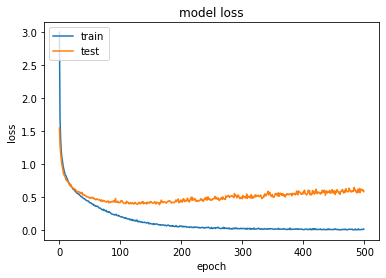

In [39]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

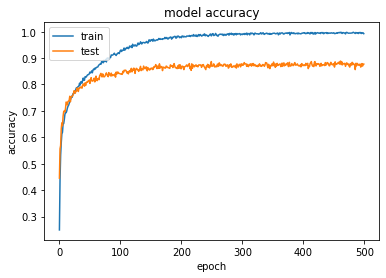

In [40]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
predictions = model.predict_classes(x_testcnn)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 7, 6, ..., 1, 7, 4], dtype=int64)

In [ ]:
y_test

In [42]:

new_Ytest = y_test.astype(int)
new_Ytest

array([4, 4, 6, ..., 1, 7, 4])

In [43]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       111
           1       0.73      0.85      0.79        78
           2       0.89      0.86      0.88       148
           3       0.85      0.84      0.84       164
           4       0.91      0.91      0.91       174
           5       0.92      0.92      0.92       149
           6       0.90      0.84      0.87       113
           7       0.90      0.89      0.90       114

    accuracy                           0.88      1051
   macro avg       0.87      0.88      0.87      1051
weighted avg       0.88      0.88      0.88      1051



In [44]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 99   7   1   3   0   0   1   0]
 [  4  66   4   3   1   0   0   0]
 [  0   4 128   4   4   3   4   1]
 [  3  11   2 137   3   5   0   3]
 [  1   2   1   3 158   1   6   2]
 [  2   0   2   7   1 137   0   0]
 [  2   0   1   4   4   2  95   5]
 [  3   0   5   0   3   1   0 102]]


In [45]:

loss, acc = model.evaluate(x_testcnn, y_test)
print("Model accuracy: {:5.2f}%".format(100*acc))


33/33 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.8773
Model accuracy: 87.73%
